特徴量候補

In [2300]:
'''
特徴量候補 

やったこと
軸足とボールの距離
->processed_whole_df['LEFT_HEEL_x_now']-processed_whole_df['RIGHT_HEEL_x_now'] 
->ユークリッド距離 ?
腕の振り上げ
体の角度(右と左両方重要そう)->腰と肩の角度から　改善の余地あり
腰の回転(beforeとafter,beforeとnowで比較 afterは精度が低い？)
フォロースルー（振り上げ後の認識の精度が悪く，足の振り上げが前からのみの撮影のため，精度がよくない）
蹴ったあと少しジャンプ？(かかととつま先の中点の差　かかとのみも)
PCA 全部に対してはやった
蹴る前の足の振り上げも（角度で攻める？）(膝からかかとの角度　膝から膝の角度)
PCAをk近傍法 ☆
アンサンブル->lightgbm SVM non_lenear_SVM logistic
良い特徴っぽい座標をbinning (pca_0,LEFT_ANKLE_x_now,LEFT_HEEL_x_nowでさらにこれの集約のカテゴリなどでtarget encoding)
左かかとが良い特徴っぽいので，それと各部位の距離を特徴量に

やってないこと
junp特徴量の修正->かかととつま先のベクトルの角度
線形モデルでは，相関の高い変数は外す
集約する
色々な差を取ってみる
列の平均との差
脳死でbeforeとafterの差分
PCA 特定の列に
ボールの位置はnowの左足で特定可能!?
（蹴る前と後で全体的に座標が変わっているかもだけど何とかなる？？）

'''

"\n特徴量候補 \n\nやったこと\n軸足とボールの距離\n->processed_whole_df['LEFT_HEEL_x_now']-processed_whole_df['RIGHT_HEEL_x_now'] \n->ユークリッド距離 ?\n腕の振り上げ\n体の角度(右と左両方重要そう)->腰と肩の角度から\u3000改善の余地あり\n腰の回転(beforeとafter,beforeとnowで比較 afterは精度が低い？)\nフォロースルー（振り上げ後の認識の精度が悪く，足の振り上げが前からのみの撮影のため，精度がよくない）\n蹴ったあと少しジャンプ？(かかととつま先の中点の差\u3000かかとのみも)\nPCA 全部に対してはやった\n蹴る前の足の振り上げも（角度で攻める？）(膝からかかとの角度\u3000膝から膝の角度)\nPCAをk近傍法 ☆\nアンサンブル->lightgbm SVM non_lenear_SVM logistic\n良い特徴っぽい座標をbinning (pca_0,LEFT_ANKLE_x_now,LEFT_HEEL_x_nowでさらにこれの集約のカテゴリなどでtarget encoding)\n\nやってないこと\njunp特徴量の修正->かかととつま先のベクトルの角度\n線形モデルでは，相関の高い変数は外す\n集約する\n色々な差を取ってみる\n列の平均との差\n脳死でbeforeとafterの差分\nPCA 特定の列に\nボールの位置はnowの左足で特定可能!?\n（蹴る前と後で全体的に座標が変わっているかもだけど何とかなる？？）\n\n"

In [2301]:
'''足のどこにあてるか，振るスピードが結局重要'''

'足のどこにあてるか，振るスピードが結局重要'

In [2302]:
'''
0.NOSE #
1.LEFT_EYE_INNER #
2.LEFT_EYE #
3.LEFT_EYE_OUTER #
4.RIGHT_EYE_INNER #
5.RIGHT_EYE #
6.RIGHT_EYE_OUTER #
7.LEFT_EAR #
8.RIGHT_EAR #
9.MOUTH_LEFT #
10.MOUTH_RIGHT #
11.LEFT_SHOULDER 
12.RIGHT_SHOULDER
13.LEFT_ELBOW
14.RIGHT_ELBOW
15.LEFT_WRIST
16.RIGHT_WRIST
17.LEFT_PINKY
18.RIGHT_PINKY
19.LEFT_INDEX
20.RIGHT_INDEX
21.LEFT_THUMB
22.RIGHT_THUMB
23.LEFT_HIP
24.RIGHT_HIP
25.LEFT_KNEE
26.RIGHT_KNEE
27.LEFT_ANKLE
28.RIGHT_ANKLE
29.LEFT_HEEL
30.RIGHT_HEEL
31.LEFT_FOOT_INDEX
32.RIGHT_FOOT_INDEX
腰の中点を原点として、値が小さいほどカメラに近くなる。全身モードでのみ予測される。([0.0、1.0])
 - visibility : 画像表示(存在し遮られていない)の可能性。([0.0、1.0])
'''

'\n0.NOSE #\n1.LEFT_EYE_INNER #\n2.LEFT_EYE #\n3.LEFT_EYE_OUTER #\n4.RIGHT_EYE_INNER #\n5.RIGHT_EYE #\n6.RIGHT_EYE_OUTER #\n7.LEFT_EAR #\n8.RIGHT_EAR #\n9.MOUTH_LEFT #\n10.MOUTH_RIGHT #\n11.LEFT_SHOULDER \n12.RIGHT_SHOULDER\n13.LEFT_ELBOW\n14.RIGHT_ELBOW\n15.LEFT_WRIST\n16.RIGHT_WRIST\n17.LEFT_PINKY\n18.RIGHT_PINKY\n19.LEFT_INDEX\n20.RIGHT_INDEX\n21.LEFT_THUMB\n22.RIGHT_THUMB\n23.LEFT_HIP\n24.RIGHT_HIP\n25.LEFT_KNEE\n26.RIGHT_KNEE\n27.LEFT_ANKLE\n28.RIGHT_ANKLE\n29.LEFT_HEEL\n30.RIGHT_HEEL\n31.LEFT_FOOT_INDEX\n32.RIGHT_FOOT_INDEX\n腰の中点を原点として、値が小さいほどカメラに近くなる。全身モードでのみ予測される。([0.0、1.0])\n - visibility : 画像表示(存在し遮られていない)の可能性。([0.0、1.0])\n'

In [2303]:
!pip install mediapipe

In [2304]:
!pip install cv2

ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


体の部位list

In [4756]:
#列の名前リスト
rows=[
    'NOSE',
    'LEFT_EYE_INNER',
    'LEFT_EYE',
    'LEFT_EYE_OUTER',
    'RIGHT_EYE_INNER',
    'RIGHT_EYE',
    'RIGHT_EYE_OUTER',
    'LEFT_EAR',
    'RIGHT_EAR',
    'MOUTH_LEFT',
    'MOUTH_RIGHT',
    'LEFT_SHOULDER',
    'RIGHT_SHOULDER',
    'LEFT_ELBOW',
    'RIGHT_ELBOW',
    'LEFT_WRIST',
    'RIGHT_WRIST',
    'LEFT_PINKY',
    'RIGHT_PINKY',
    'LEFT_INDEX',
    'RIGHT_INDEX',
    'LEFT_THUMB',
    'RIGHT_THUMB',
    'LEFT_HIP',
    'RIGHT_HIP',
    'LEFT_KNEE',
    'RIGHT_KNEE',
    'LEFT_ANKLE',
    'RIGHT_ANKLE',
    'LEFT_HEEL',
    'RIGHT_HEEL',
    'LEFT_FOOT_INDEX',
    'RIGHT_FOOT_INDEX',
    ]
'''
rows_new=[]
for i in range(len(rows)*3*3):
    if (i%3==0)&(i<=98):
        rows_new.append(rows[int(i/3)%33]+'_x_before')
    if (i%3==1)&(i<=98):
        rows_new.append(rows[int(i/3)%33]+'_y_before')
    if (i%3==2)&(i<=98):
        rows_new.append(rows[int(i/3)%33]+'_z_before')   
    if (i%3==0)&(i>=99)&(i<=197):
        rows_new.append(rows[int(i/3)%33]+'_x_now')
    if (i%3==1)&(i>=99)&(i<=197):
        rows_new.append(rows[int(i/3)%33]+'_y_now')
    if (i%3==2)&(i>=99)&(i<=197):
        rows_new.append(rows[int(i/3)%33]+'_z_now')
    if (i%3==0)&(i>=198)&(i<=296):
        rows_new.append(rows[int(i/3)%33]+'_x_after')
    if (i%3==1)&(i>=198)&(i<=296):
        rows_new.append(rows[int(i/3)%33]+'_y_after')
    if (i%3==2)&(i>=198)&(i<=296):
        rows_new.append(rows[int(i/3)%33]+'_z_after')
'''

rows_new=[
 'NOSE_x_before',
 'NOSE_y_before',
 'NOSE_z_before',
 'LEFT_EYE_INNER_x_before',
 'LEFT_EYE_INNER_y_before',
 'LEFT_EYE_INNER_z_before',
 'LEFT_EYE_x_before',
 'LEFT_EYE_y_before',
 'LEFT_EYE_z_before',
 'LEFT_EYE_OUTER_x_before',
 'LEFT_EYE_OUTER_y_before',
 'LEFT_EYE_OUTER_z_before',
 'RIGHT_EYE_INNER_x_before',
 'RIGHT_EYE_INNER_y_before',
 'RIGHT_EYE_INNER_z_before',
 'RIGHT_EYE_x_before',
 'RIGHT_EYE_y_before',
 'RIGHT_EYE_z_before',
 'RIGHT_EYE_OUTER_x_before',
 'RIGHT_EYE_OUTER_y_before',
 'RIGHT_EYE_OUTER_z_before',
 'LEFT_EAR_x_before',
 'LEFT_EAR_y_before',
 'LEFT_EAR_z_before',
 'RIGHT_EAR_x_before',
 'RIGHT_EAR_y_before',
 'RIGHT_EAR_z_before',
 'MOUTH_LEFT_x_before',
 'MOUTH_LEFT_y_before',
 'MOUTH_LEFT_z_before',
 'MOUTH_RIGHT_x_before',
 'MOUTH_RIGHT_y_before',
 'MOUTH_RIGHT_z_before',
 'LEFT_SHOULDER_x_before',
 'LEFT_SHOULDER_y_before',
 'LEFT_SHOULDER_z_before',
 'RIGHT_SHOULDER_x_before',
 'RIGHT_SHOULDER_y_before',
 'RIGHT_SHOULDER_z_before',
 'LEFT_ELBOW_x_before',
 'LEFT_ELBOW_y_before',
 'LEFT_ELBOW_z_before',
 'RIGHT_ELBOW_x_before',
 'RIGHT_ELBOW_y_before',
 'RIGHT_ELBOW_z_before',
 'LEFT_WRIST_x_before',
 'LEFT_WRIST_y_before',
 'LEFT_WRIST_z_before',
 'RIGHT_WRIST_x_before',
 'RIGHT_WRIST_y_before',
 'RIGHT_WRIST_z_before',
 'LEFT_PINKY_x_before',
 'LEFT_PINKY_y_before',
 'LEFT_PINKY_z_before',
 'RIGHT_PINKY_x_before',
 'RIGHT_PINKY_y_before',
 'RIGHT_PINKY_z_before',
 'LEFT_INDEX_x_before',
 'LEFT_INDEX_y_before',
 'LEFT_INDEX_z_before',
 'RIGHT_INDEX_x_before',
 'RIGHT_INDEX_y_before',
 'RIGHT_INDEX_z_before',
 'LEFT_THUMB_x_before',
 'LEFT_THUMB_y_before',
 'LEFT_THUMB_z_before',
 'RIGHT_THUMB_x_before',
 'RIGHT_THUMB_y_before',
 'RIGHT_THUMB_z_before',
 'LEFT_HIP_x_before',
 'LEFT_HIP_y_before',
 'LEFT_HIP_z_before',
 'RIGHT_HIP_x_before',
 'RIGHT_HIP_y_before',
 'RIGHT_HIP_z_before',
 'LEFT_KNEE_x_before',
 'LEFT_KNEE_y_before',
 'LEFT_KNEE_z_before',
 'RIGHT_KNEE_x_before',
 'RIGHT_KNEE_y_before',
 'RIGHT_KNEE_z_before',
 'LEFT_ANKLE_x_before',
 'LEFT_ANKLE_y_before',
 'LEFT_ANKLE_z_before',
 'RIGHT_ANKLE_x_before',
 'RIGHT_ANKLE_y_before',
 'RIGHT_ANKLE_z_before',
 'LEFT_HEEL_x_before',
 'LEFT_HEEL_y_before',
 'LEFT_HEEL_z_before',
 'RIGHT_HEEL_x_before',
 'RIGHT_HEEL_y_before',
 'RIGHT_HEEL_z_before',
 'LEFT_FOOT_INDEX_x_before',
 'LEFT_FOOT_INDEX_y_before',
 'LEFT_FOOT_INDEX_z_before',
 'RIGHT_FOOT_INDEX_x_before',
 'RIGHT_FOOT_INDEX_y_before',
 'RIGHT_FOOT_INDEX_z_before',
 'NOSE_x_now',
 'NOSE_y_now',
 'NOSE_z_now',
 'LEFT_EYE_INNER_x_now',
 'LEFT_EYE_INNER_y_now',
 'LEFT_EYE_INNER_z_now',
 'LEFT_EYE_x_now',
 'LEFT_EYE_y_now',
 'LEFT_EYE_z_now',
 'LEFT_EYE_OUTER_x_now',
 'LEFT_EYE_OUTER_y_now',
 'LEFT_EYE_OUTER_z_now',
 'RIGHT_EYE_INNER_x_now',
 'RIGHT_EYE_INNER_y_now',
 'RIGHT_EYE_INNER_z_now',
 'RIGHT_EYE_x_now',
 'RIGHT_EYE_y_now',
 'RIGHT_EYE_z_now',
 'RIGHT_EYE_OUTER_x_now',
 'RIGHT_EYE_OUTER_y_now',
 'RIGHT_EYE_OUTER_z_now',
 'LEFT_EAR_x_now',
 'LEFT_EAR_y_now',
 'LEFT_EAR_z_now',
 'RIGHT_EAR_x_now',
 'RIGHT_EAR_y_now',
 'RIGHT_EAR_z_now',
 'MOUTH_LEFT_x_now',
 'MOUTH_LEFT_y_now',
 'MOUTH_LEFT_z_now',
 'MOUTH_RIGHT_x_now',
 'MOUTH_RIGHT_y_now',
 'MOUTH_RIGHT_z_now',
 'LEFT_SHOULDER_x_now',
 'LEFT_SHOULDER_y_now',
 'LEFT_SHOULDER_z_now',
 'RIGHT_SHOULDER_x_now',
 'RIGHT_SHOULDER_y_now',
 'RIGHT_SHOULDER_z_now',
 'LEFT_ELBOW_x_now',
 'LEFT_ELBOW_y_now',
 'LEFT_ELBOW_z_now',
 'RIGHT_ELBOW_x_now',
 'RIGHT_ELBOW_y_now',
 'RIGHT_ELBOW_z_now',
 'LEFT_WRIST_x_now',
 'LEFT_WRIST_y_now',
 'LEFT_WRIST_z_now',
 'RIGHT_WRIST_x_now',
 'RIGHT_WRIST_y_now',
 'RIGHT_WRIST_z_now',
 'LEFT_PINKY_x_now',
 'LEFT_PINKY_y_now',
 'LEFT_PINKY_z_now',
 'RIGHT_PINKY_x_now',
 'RIGHT_PINKY_y_now',
 'RIGHT_PINKY_z_now',
 'LEFT_INDEX_x_now',
 'LEFT_INDEX_y_now',
 'LEFT_INDEX_z_now',
 'RIGHT_INDEX_x_now',
 'RIGHT_INDEX_y_now',
 'RIGHT_INDEX_z_now',
 'LEFT_THUMB_x_now',
 'LEFT_THUMB_y_now',
 'LEFT_THUMB_z_now',
 'RIGHT_THUMB_x_now',
 'RIGHT_THUMB_y_now',
 'RIGHT_THUMB_z_now',
 'LEFT_HIP_x_now',
 'LEFT_HIP_y_now',
 'LEFT_HIP_z_now',
 'RIGHT_HIP_x_now',
 'RIGHT_HIP_y_now',
 'RIGHT_HIP_z_now',
 'LEFT_KNEE_x_now',
 'LEFT_KNEE_y_now',
 'LEFT_KNEE_z_now',
 'RIGHT_KNEE_x_now',
 'RIGHT_KNEE_y_now',
 'RIGHT_KNEE_z_now',
 'LEFT_ANKLE_x_now',
 'LEFT_ANKLE_y_now',
 'LEFT_ANKLE_z_now',
 'RIGHT_ANKLE_x_now',
 'RIGHT_ANKLE_y_now',
 'RIGHT_ANKLE_z_now',
 'LEFT_HEEL_x_now',
 'LEFT_HEEL_y_now',
 'LEFT_HEEL_z_now',
 'RIGHT_HEEL_x_now',
 'RIGHT_HEEL_y_now',
 'RIGHT_HEEL_z_now',
 'LEFT_FOOT_INDEX_x_now',
 'LEFT_FOOT_INDEX_y_now',
 'LEFT_FOOT_INDEX_z_now',
 'RIGHT_FOOT_INDEX_x_now',
 'RIGHT_FOOT_INDEX_y_now',
 'RIGHT_FOOT_INDEX_z_now',
 'NOSE_x_after',
 'NOSE_y_after',
 'NOSE_z_after',
 'LEFT_EYE_INNER_x_after',
 'LEFT_EYE_INNER_y_after',
 'LEFT_EYE_INNER_z_after',
 'LEFT_EYE_x_after',
 'LEFT_EYE_y_after',
 'LEFT_EYE_z_after',
 'LEFT_EYE_OUTER_x_after',
 'LEFT_EYE_OUTER_y_after',
 'LEFT_EYE_OUTER_z_after',
 'RIGHT_EYE_INNER_x_after',
 'RIGHT_EYE_INNER_y_after',
 'RIGHT_EYE_INNER_z_after',
 'RIGHT_EYE_x_after',
 'RIGHT_EYE_y_after',
 'RIGHT_EYE_z_after',
 'RIGHT_EYE_OUTER_x_after',
 'RIGHT_EYE_OUTER_y_after',
 'RIGHT_EYE_OUTER_z_after',
 'LEFT_EAR_x_after',
 'LEFT_EAR_y_after',
 'LEFT_EAR_z_after',
 'RIGHT_EAR_x_after',
 'RIGHT_EAR_y_after',
 'RIGHT_EAR_z_after',
 'MOUTH_LEFT_x_after',
 'MOUTH_LEFT_y_after',
 'MOUTH_LEFT_z_after',
 'MOUTH_RIGHT_x_after',
 'MOUTH_RIGHT_y_after',
 'MOUTH_RIGHT_z_after',
 'LEFT_SHOULDER_x_after',
 'LEFT_SHOULDER_y_after',
 'LEFT_SHOULDER_z_after',
 'RIGHT_SHOULDER_x_after',
 'RIGHT_SHOULDER_y_after',
 'RIGHT_SHOULDER_z_after',
 'LEFT_ELBOW_x_after',
 'LEFT_ELBOW_y_after',
 'LEFT_ELBOW_z_after',
 'RIGHT_ELBOW_x_after',
 'RIGHT_ELBOW_y_after',
 'RIGHT_ELBOW_z_after',
 'LEFT_WRIST_x_after',
 'LEFT_WRIST_y_after',
 'LEFT_WRIST_z_after',
 'RIGHT_WRIST_x_after',
 'RIGHT_WRIST_y_after',
 'RIGHT_WRIST_z_after',
 'LEFT_PINKY_x_after',
 'LEFT_PINKY_y_after',
 'LEFT_PINKY_z_after',
 'RIGHT_PINKY_x_after',
 'RIGHT_PINKY_y_after',
 'RIGHT_PINKY_z_after',
 'LEFT_INDEX_x_after',
 'LEFT_INDEX_y_after',
 'LEFT_INDEX_z_after',
 'RIGHT_INDEX_x_after',
 'RIGHT_INDEX_y_after',
 'RIGHT_INDEX_z_after',
 'LEFT_THUMB_x_after',
 'LEFT_THUMB_y_after',
 'LEFT_THUMB_z_after',
 'RIGHT_THUMB_x_after',
 'RIGHT_THUMB_y_after',
 'RIGHT_THUMB_z_after',
 'LEFT_HIP_x_after',
 'LEFT_HIP_y_after',
 'LEFT_HIP_z_after',
 'RIGHT_HIP_x_after',
 'RIGHT_HIP_y_after',
 'RIGHT_HIP_z_after',
 'LEFT_KNEE_x_after',
 'LEFT_KNEE_y_after',
 'LEFT_KNEE_z_after',
 'RIGHT_KNEE_x_after',
 'RIGHT_KNEE_y_after',
 'RIGHT_KNEE_z_after',
 'LEFT_ANKLE_x_after',
 'LEFT_ANKLE_y_after',
 'LEFT_ANKLE_z_after',
 'RIGHT_ANKLE_x_after',
 'RIGHT_ANKLE_y_after',
 'RIGHT_ANKLE_z_after',
 'LEFT_HEEL_x_after',
 'LEFT_HEEL_y_after',
 'LEFT_HEEL_z_after',
 'RIGHT_HEEL_x_after',
 'RIGHT_HEEL_y_after',
 'RIGHT_HEEL_z_after',
 'LEFT_FOOT_INDEX_x_after',
 'LEFT_FOOT_INDEX_y_after',
 'LEFT_FOOT_INDEX_z_after',
 'RIGHT_FOOT_INDEX_x_after',
 'RIGHT_FOOT_INDEX_y_after',
 'RIGHT_FOOT_INDEX_z_after']

remove_rows=[
 'NOSE_x_before',
 'NOSE_y_before',
 'NOSE_z_before',
 'LEFT_EYE_INNER_x_before',
 'LEFT_EYE_INNER_y_before',
 'LEFT_EYE_INNER_z_before',
 'LEFT_EYE_x_before',
 'LEFT_EYE_y_before',
 'LEFT_EYE_z_before',
 'LEFT_EYE_OUTER_x_before',
 'LEFT_EYE_OUTER_y_before',
 'LEFT_EYE_OUTER_z_before',
 'RIGHT_EYE_INNER_x_before',
 'RIGHT_EYE_INNER_y_before',
 'RIGHT_EYE_INNER_z_before',
 'RIGHT_EYE_x_before',
 'RIGHT_EYE_y_before',
 'RIGHT_EYE_z_before',
 'RIGHT_EYE_OUTER_x_before',
 'RIGHT_EYE_OUTER_y_before',
 'RIGHT_EYE_OUTER_z_before',
 'LEFT_EAR_x_before',
 'LEFT_EAR_y_before',
 'LEFT_EAR_z_before',
 'RIGHT_EAR_x_before',
 'RIGHT_EAR_y_before',
 'RIGHT_EAR_z_before',
 'MOUTH_LEFT_x_before',
 'MOUTH_LEFT_y_before',
 'MOUTH_LEFT_z_before',
 'MOUTH_RIGHT_x_before',
 'MOUTH_RIGHT_y_before',
 'MOUTH_RIGHT_z_before',
 'NOSE_x_now',
 'NOSE_y_now',
 'NOSE_z_now',
 'LEFT_EYE_INNER_x_now',
 'LEFT_EYE_INNER_y_now',
 'LEFT_EYE_INNER_z_now',
 'LEFT_EYE_x_now',
 'LEFT_EYE_y_now',
 'LEFT_EYE_z_now',
 'LEFT_EYE_OUTER_x_now',
 'LEFT_EYE_OUTER_y_now',
 'LEFT_EYE_OUTER_z_now',
 'RIGHT_EYE_INNER_x_now',
 'RIGHT_EYE_INNER_y_now',
 'RIGHT_EYE_INNER_z_now',
 'RIGHT_EYE_x_now',
 'RIGHT_EYE_y_now',
 'RIGHT_EYE_z_now',
 'RIGHT_EYE_OUTER_x_now',
 'RIGHT_EYE_OUTER_y_now',
 'RIGHT_EYE_OUTER_z_now',
 'LEFT_EAR_x_now',
 'LEFT_EAR_y_now',
 'LEFT_EAR_z_now',
 'RIGHT_EAR_x_now',
 'RIGHT_EAR_y_now',
 'RIGHT_EAR_z_now',
 'MOUTH_LEFT_x_now',
 'MOUTH_LEFT_y_now',
 'MOUTH_LEFT_z_now',
 'MOUTH_RIGHT_x_now',
 'MOUTH_RIGHT_y_now',
 'MOUTH_RIGHT_z_now',
 'NOSE_x_after',
 'NOSE_y_after',
 'NOSE_z_after',
 'LEFT_EYE_INNER_x_after',
 'LEFT_EYE_INNER_y_after',
 'LEFT_EYE_INNER_z_after',
 'LEFT_EYE_x_after',
 'LEFT_EYE_y_after',
 'LEFT_EYE_z_after',
 'LEFT_EYE_OUTER_x_after',
 'LEFT_EYE_OUTER_y_after',
 'LEFT_EYE_OUTER_z_after',
 'RIGHT_EYE_INNER_x_after',
 'RIGHT_EYE_INNER_y_after',
 'RIGHT_EYE_INNER_z_after',
 'RIGHT_EYE_x_after',
 'RIGHT_EYE_y_after',
 'RIGHT_EYE_z_after',
 'RIGHT_EYE_OUTER_x_after',
 'RIGHT_EYE_OUTER_y_after',
 'RIGHT_EYE_OUTER_z_after',
 'LEFT_EAR_x_after',
 'LEFT_EAR_y_after',
 'LEFT_EAR_z_after',
 'RIGHT_EAR_x_after',
 'RIGHT_EAR_y_after',
 'RIGHT_EAR_z_after',
 'MOUTH_LEFT_x_after',
 'MOUTH_LEFT_y_after',
 'MOUTH_LEFT_z_after',
 'MOUTH_RIGHT_x_after',
 'MOUTH_RIGHT_y_after',
 'MOUTH_RIGHT_z_after'
 ]

import部分

In [2306]:
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import random
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from pandas_profiling import ProfileReport # profile report を作る用
from matplotlib_venn import venn2 # venn図を作成する用
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
!pip install texthero
import texthero as hero
import nltk
import matplotlib
matplotlib.use("TkAgg")
%matplotlib inline
sns.set_style('ticks')

file_listの作成

In [2870]:
import glob

file_list=[]
files = glob.glob('*')
for file in files:
    file_list.append(file)
#画像でないファイル
file_list.remove('openpose.ipynb')  

Openposeによる各座標の取得及びdfの取得準備

In [2871]:
import numpy as np
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose
list_df=[]
step=0
index=-1
pre_idx=-1
# For static images:
IMAGE_FILES = file_list
BG_COLOR = (192, 192, 192) # gray
with mp_pose.Pose(
    static_image_mode=True,
    model_complexity=2,
    enable_segmentation=True,
    min_detection_confidence=0) as pose:
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    image_height, image_width, _ = image.shape
    # Convert the BGR image to RGB before processing.
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if not results.pose_landmarks:
      #異常なデータたちをprint，これらを削除(教師ラベルのアノテーションも修正する．)
      print('idx: '+str(idx)+' pre_idx: '+str(pre_idx)+' '+str(file))
      continue
    '''
    print(
        f'Nose coordinates: ('
        f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width}, '
        f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_height})'
    )'''

    annotated_image = image.copy()
    # Draw segmentation on the image.
    # To improve segmentation around boundaries, consider applying a joint
    # bilateral filter to "results.segmentation_mask" with "image".
    condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
    bg_image = np.zeros(image.shape, dtype=np.uint8)
    bg_image[:] = BG_COLOR
    annotated_image = np.where(condition, annotated_image, bg_image)
    # Draw pose landmarks on the image.
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    cv2.imwrite('/tmp/annotated_image' + str(idx) + '.png', annotated_image)
    # Plot pose world landmarks.
    '''
    if idx>60:
      mp_drawing.plot_landmarks(
        results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
      print(results.pose_world_landmarks)
    '''
    if idx%3==0:
      index+=1
      list_df.append([])
    for i in range(33):
      list_df[index].append(results.pose_world_landmarks.landmark[i].x)
      list_df[index].append(results.pose_world_landmarks.landmark[i].y)
      list_df[index].append(results.pose_world_landmarks.landmark[i].z)
    pre_idx=idx

# データ読み込み以外はここからスタート

In [6112]:
#Openposeの結果をdataframeに
whole_df=pd.DataFrame(list_df,columns=rows_new) 
sequence=[x for x in range(whole_df.shape[0])]
sequence=np.array(sequence)
whole_df['index']=sequence
whole_df.shape

(226, 298)

In [6113]:
whole_df

,NOSE_x_before,NOSE_y_before,NOSE_z_before,LEFT_EYE_INNER_x_before,LEFT_EYE_INNER_y_before,LEFT_EYE_INNER_z_before,LEFT_EYE_x_before,LEFT_EYE_y_before,LEFT_EYE_z_before,LEFT_EYE_OUTER_x_before,...,RIGHT_HEEL_x_after,RIGHT_HEEL_y_after,RIGHT_HEEL_z_after,LEFT_FOOT_INDEX_x_after,LEFT_FOOT_INDEX_y_after,LEFT_FOOT_INDEX_z_after,RIGHT_FOOT_INDEX_x_after,RIGHT_FOOT_INDEX_y_after,RIGHT_FOOT_INDEX_z_after,index
0,0.021612,-0.545980,0.078299,0.008719,-0.564210,0.055640,0.008657,-0.563837,0.065744,0.009806,...,0.190495,0.455189,0.548363,0.085820,0.777085,0.076021,0.170163,0.441645,0.632029,0
1,-0.020936,-0.544681,0.135217,-0.032682,-0.557782,0.110725,-0.032683,-0.558471,0.121157,-0.031297,...,0.288954,0.537415,0.346750,0.190093,0.744977,0.023074,0.299770,0.490422,0.389081,1
2,-0.010504,-0.572791,0.058609,-0.024343,-0.586878,0.029470,-0.025051,-0.587804,0.042124,-0.023742,...,0.211326,0.573263,0.380821,0.110647,0.738037,0.069666,0.231661,0.540963,0.420307,2
3,-0.032893,-0.570724,0.047770,-0.049958,-0.585902,0.022759,-0.049300,-0.585409,0.032667,-0.048415,...,0.156053,0.571269,0.299336,0.209498,0.781741,0.080206,0.209260,0.576617,0.332366,3
4,-0.018415,-0.559685,0.077774,-0.033563,-0.572862,0.047473,-0.033262,-0.572507,0.058576,-0.032682,...,0.237807,0.550027,-0.018470,0.215015,0.857396,-0.051296,0.313758,0.496610,-0.027268,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,0.131461,-0.537843,0.003519,0.121972,-0.562521,-0.014035,0.121813,-0.560640,-0.004259,0.123174,...,0.012203,0.145369,0.375173,0.236562,0.825418,0.041254,0.045719,0.124052,0.443089,221
222,0.153007,-0.497630,-0.023336,0.150747,-0.521597,-0.051687,0.149912,-0.520077,-0.040467,0.152091,...,0.081992,0.107864,0.173138,0.191002,0.774974,-0.003551,0.143782,0.092232,0.199702,222
223,0.077752,-0.526046,-0.033720,0.066734,-0.547906,-0.062134,0.065791,-0.549107,-0.049252,0.068273,...,0.007659,0.529803,0.199688,0.220288,0.786171,-0.007303,0.041589,0.535049,0.232227,223
224,0.015329,-0.564392,0.015328,0.003683,-0.585622,-0.007527,0.003205,-0.583516,0.002816,0.004002,...,0.088069,-0.085890,0.361623,0.253572,0.727694,0.240530,0.145719,-0.078393,0.425804,224


教師ラベルのアノテーション

In [6114]:
'IDの割り当て'
a0_number=11
a1_number=8
a2_number=13
a3_number=15
a4_number=20
a5_number=32
a6_number=33
a7_number=31
a8_number=31
a9_number=33

'''
教師用ラベル　
6959~6988 0年 0 ->33/3=11
6989~7016 12年 1 ->24/3=8
7021~7074 0年 0 ->39/3=13
7075~7119 0年 0 ->45/3=15
7124~7189 12年 1 ->60/3=20
7193~7289 9年 1 ->96/3=32
7291~7389 0年 0 ->99/3=33
7400~7495 12年 1 ->93/3=31
7496~7590 0年 0 ->93/3=31
7593~7692 12年 1 ->99/3=33
'''
BEGINNER=0
INTERMEDIATE=2
ADVANCED=1
whole_df['category']=0
whole_df['ID']=0
#S.W
whole_df.loc[((whole_df['index']>=0)&(whole_df['index']<a0_number)),['category']]=BEGINNER
whole_df.loc[((whole_df['index']>=0)&(whole_df['index']<a0_number)),['ID']]=0
#T.W(男)
a1_number=a1_number+a0_number
whole_df.loc[((whole_df['index']>=a0_number)&(whole_df['index']<a1_number)),['category']]=ADVANCED
whole_df.loc[((whole_df['index']>=a0_number)&(whole_df['index']<a1_number)),['ID']]=1
#K.W
a2_number=a2_number+a1_number
whole_df.loc[((whole_df['index']>=a1_number)&(whole_df['index']<a2_number)),['category']]=BEGINNER
whole_df.loc[((whole_df['index']>=a1_number)&(whole_df['index']<a2_number)),['ID']]=2
#T.W(女)
a3_number=a3_number+a2_number
whole_df.loc[((whole_df['index']>=a2_number)&(whole_df['index']<a3_number)),['category']]=BEGINNER
whole_df.loc[((whole_df['index']>=a2_number)&(whole_df['index']<a3_number)),['ID']]=3
#H.N
a4_number=a4_number+a3_number
whole_df.loc[((whole_df['index']>=a3_number)&(whole_df['index']<a4_number)),['category']]=ADVANCED
whole_df.loc[((whole_df['index']>=a3_number)&(whole_df['index']<a4_number)),['ID']]=4
#S.S
a5_number=a5_number+a4_number
whole_df.loc[((whole_df['index']>=a4_number)&(whole_df['index']<a5_number)),['category']]=ADVANCED
whole_df.loc[((whole_df['index']>=a4_number)&(whole_df['index']<a5_number)),['ID']]=5
#S.T
a6_number=a6_number+a5_number
whole_df.loc[((whole_df['index']>=a5_number)&(whole_df['index']<a6_number)),['category']]=BEGINNER
whole_df.loc[((whole_df['index']>=a5_number)&(whole_df['index']<a6_number)),['ID']]=6
#R.H
a7_number=a7_number+a6_number
whole_df.loc[((whole_df['index']>=a6_number)&(whole_df['index']<a7_number)),['category']]=ADVANCED
whole_df.loc[((whole_df['index']>=a6_number)&(whole_df['index']<a7_number)),['ID']]=7
#K.H
a8_number=a8_number+a7_number
whole_df.loc[((whole_df['index']>=a7_number)&(whole_df['index']<a8_number)),['category']]=BEGINNER
whole_df.loc[((whole_df['index']>=a7_number)&(whole_df['index']<a8_number)),['ID']]=8
#G.N
a9_number=a9_number+a8_number
whole_df.loc[((whole_df['index']>=a8_number)&(whole_df['index']<a9_number)),['category']]=ADVANCED
whole_df.loc[((whole_df['index']>=a8_number)&(whole_df['index']<a9_number)),['ID']]=9
#R.T


trainとtestの作成

In [6115]:
#まず，trainとtestの作成
#1/3個の経験者と未経験者の人のデータを取ってくる
begginer_id_list=whole_df[(whole_df['category']==0)]['ID'].unique().tolist()
advanced_id_list=whole_df[(whole_df['category']==1)]['ID'].unique().tolist()
###############ここの1/3のテストデータ率はデータが増えたら変える．################
begginer_test_id_list=random.sample(begginer_id_list,int(len(begginer_id_list)/2.5))
begginer_train_id_list=list(set(begginer_id_list)-set(begginer_test_id_list))
#明日になれば1以上になる
advanced_test_id_list=random.sample(advanced_id_list,int(len(advanced_id_list)/2.5))
advanced_train_id_list=list(set(advanced_id_list)-set(advanced_test_id_list))
##########train_dfの作成###########
#初心者
train_df=pd.DataFrame()
for i in begginer_train_id_list:
    train_df=pd.concat([train_df,whole_df[(whole_df['ID']==i)]])
#経験者
for i in advanced_train_id_list:
    train_df=pd.concat([train_df,whole_df[(whole_df['ID']==i)]])
train_df=train_df.reset_index()
train_cv_df=train_df.copy()
print(train_cv_df['ID'])
y = train_df['category'].values
##########test_dfの作成############
#初心者
test_df=pd.DataFrame()
for i in begginer_test_id_list:
    test_df=pd.concat([test_df,whole_df[(whole_df['ID']==i)]])
#経験者
for i in advanced_test_id_list:
    test_df=pd.concat([test_df,whole_df[(whole_df['ID']==i)]])
test_df=test_df.reset_index()
test_cv_df=test_df.copy()
#testのcategory列は最終的な正解に用いる
y_ans=test_df['category'].values

0      2
1      2
2      2
3      2
4      2
      ..
127    7
128    7
129    7
130    7
131    7
Name: ID, Length: 132, dtype: int64


## testとtrainのcategoryの分布

In [6116]:
train_dist=train_df['category'].value_counts()

In [6117]:
test_dist=test_df['category'].value_counts()

In [6118]:
test_df.drop('category',axis=1,inplace=True)

特徴量作成関数

In [6119]:
#座標間のユークリッド距離
def euclidean_distance(p1x,p1y,p1z,p2x,p2y,p2z):
    return np.sqrt((p1x-p2x)**2+(p1y-p2y)**2+(p1z-p2z)**2)
    

In [6120]:
#3点の角度
def angle_of_three_points(p1x,p1y,p1z,p2x,p2y,p2z,p3x,p3y,p3z):
    list_theta=[]
    for i in range(len(p1x)):
        vec1=[p2x[i]-p1x[i],p2y[i]-p1y[i],p2z[i]-p1z[i]]
        vec2=[p3x[i]-p1x[i],p3y[i]-p1y[i],p3z[i]-p1z[i]]
        absvec1=np.linalg.norm(vec1)
        absvec2=np.linalg.norm(vec2)
        inner=np.inner(vec1,vec2)
        cos_theta=inner/(absvec1*absvec2)
        theta=math.degrees(math.acos(cos_theta))
        list_theta.append(theta)
    return np.array(list_theta)
    

In [6121]:
def body_angle(input_df):
    output_df=pd.DataFrame()
    list_df_body=[]
    list_shoulder=[]
    list_hip=[]
    p1x=input_df['LEFT_SHOULDER_x_before']
    p1y=input_df['LEFT_SHOULDER_y_before']
    p1z=input_df['LEFT_SHOULDER_z_before']
    p2x=input_df['RIGHT_SHOULDER_x_before']
    p2y=input_df['RIGHT_SHOULDER_y_before']
    p2z=input_df['RIGHT_SHOULDER_z_before']
    for i in range(input_df.shape[0]):
        vec1=[p2x[i]-p1x[i],p2y[i]-p1y[i],p2z[i]-p1z[i]]
        vec2=[p2x[i]-p1x[i],0,0]
        absvec1=np.linalg.norm(vec1)
        absvec2=np.linalg.norm(vec2)
        inner=np.inner(vec1,vec2)
        cos_theta=inner/(absvec1*absvec2)
        theta=math.degrees(math.acos(cos_theta))
        list_shoulder.append(theta)
    p1x=input_df['LEFT_HIP_x_before']
    p1y=input_df['LEFT_HIP_y_before']
    p1z=input_df['LEFT_HIP_z_before']
    p2x=input_df['RIGHT_HIP_x_before']
    p2y=input_df['RIGHT_HIP_y_before']
    p2z=input_df['RIGHT_HIP_z_before']
    for i in range(input_df.shape[0]):
        vec1=[p2x[i]-p1x[i],p2y[i]-p1y[i],p2z[i]-p1z[i]]
        vec2=[p2x[i]-p1x[i],0,0]
        absvec1=np.linalg.norm(vec1)
        absvec2=np.linalg.norm(vec2)
        inner=np.inner(vec1,vec2)
        cos_theta=inner/(absvec1*absvec2)
        theta=math.degrees(math.acos(cos_theta))
        list_hip.append(theta)
    list_df_body.append(list_shoulder)
    list_df_body.append(list_hip)
    output_df=pd.DataFrame(list_df_body)
    output_df=output_df.T
    output_df.rename(columns={0:'body_angle_shoulder',1:'body_angle_hip'},inplace=True)
    return output_df

In [6122]:
def rotation_back_after(input_df):
    p1x_b=input_df['LEFT_HIP_x_before']
    p1y_b=input_df['LEFT_HIP_y_before']
    p1z_b=input_df['LEFT_HIP_z_before']
    p2x_b=input_df['RIGHT_HIP_x_before']
    p2y_b=input_df['RIGHT_HIP_y_before']
    p2z_b=input_df['RIGHT_HIP_z_before']
    p1x_n=input_df['LEFT_HIP_x_after']
    p1y_n=input_df['LEFT_HIP_y_after']
    p1z_n=input_df['LEFT_HIP_z_after']
    p2x_n=input_df['RIGHT_HIP_x_after']
    p2y_n=input_df['RIGHT_HIP_y_after']
    p2z_n=input_df['RIGHT_HIP_z_after']
    list_theta=[]
    for i in range(input_df.shape[0]):
        vec1=[p2x_b[i]-p1x_b[i],p2y_b[i]-p1y_b[i],p2z_b[i]-p1z_b[i]]
        vec2=[p2x_n[i]-p1x_n[i],p2y_n[i]-p1y_n[i],p2z_n[i]-p1z_n[i]]
        absvec1=np.linalg.norm(vec1)
        absvec2=np.linalg.norm(vec2)
        inner=np.inner(vec1,vec2)
        cos_theta=inner/(absvec1*absvec2)
        theta=math.degrees(math.acos(cos_theta))
        list_theta.append(theta)
    return np.array(list_theta)

In [6123]:
def rotation_back_now(input_df):
    p1x_b=input_df['LEFT_HIP_x_before']
    p1y_b=input_df['LEFT_HIP_y_before']
    p1z_b=input_df['LEFT_HIP_z_before']
    p2x_b=input_df['RIGHT_HIP_x_before']
    p2y_b=input_df['RIGHT_HIP_y_before']
    p2z_b=input_df['RIGHT_HIP_z_before']
    p1x_n=input_df['LEFT_HIP_x_now']
    p1y_n=input_df['LEFT_HIP_y_now']
    p1z_n=input_df['LEFT_HIP_z_now']
    p2x_n=input_df['RIGHT_HIP_x_now']
    p2y_n=input_df['RIGHT_HIP_y_now']
    p2z_n=input_df['RIGHT_HIP_z_now']
    list_theta=[]
    for i in range(input_df.shape[0]):
        vec1=[p2x_b[i]-p1x_b[i],p2y_b[i]-p1y_b[i],p2z_b[i]-p1z_b[i]]
        vec2=[p2x_n[i]-p1x_n[i],p2y_n[i]-p1y_n[i],p2z_n[i]-p1z_n[i]]
        absvec1=np.linalg.norm(vec1)
        absvec2=np.linalg.norm(vec2)
        inner=np.inner(vec1,vec2)
        cos_theta=inner/(absvec1*absvec2)
        theta=math.degrees(math.acos(cos_theta))
        list_theta.append(theta)
    return np.array(list_theta)
    
    

In [6124]:
def follow_thorough(input_df):
    p1x_b=input_df['RIGHT_KNEE_x_before']
    p1y_b=input_df['RIGHT_KNEE_y_before']
    p1z_b=input_df['RIGHT_KNEE_z_before']
    p2x_b=input_df['RIGHT_ANKLE_x_before']
    p2y_b=input_df['RIGHT_ANKLE_y_before']
    p2z_b=input_df['RIGHT_ANKLE_z_before']
    p1x_n=input_df['RIGHT_KNEE_x_after']
    p1y_n=input_df['RIGHT_KNEE_y_after']
    p1z_n=input_df['RIGHT_KNEE_z_after']
    p2x_n=input_df['RIGHT_ANKLE_x_after']
    p2y_n=input_df['RIGHT_ANKLE_y_after']
    p2z_n=input_df['RIGHT_ANKLE_z_after']
    list_theta=[]
    for i in range(input_df.shape[0]):
        vec1=[p2x_b[i]-p1x_b[i],p2y_b[i]-p1y_b[i],p2z_b[i]-p1z_b[i]]
        vec2=[p2x_n[i]-p1x_n[i],p2y_n[i]-p1y_n[i],p2z_n[i]-p1z_n[i]]
        absvec1=np.linalg.norm(vec1)
        absvec2=np.linalg.norm(vec2)
        inner=np.inner(vec1,vec2)
        cos_theta=inner/(absvec1*absvec2)
        theta=math.degrees(math.acos(cos_theta))
        list_theta.append(theta)
    return np.array(list_theta)

In [6125]:
def right_leg_elevation_thigh(input_df):
    p1x_b=input_df['RIGHT_KNEE_x_before']
    p1y_b=input_df['RIGHT_KNEE_y_before']
    p1z_b=input_df['RIGHT_KNEE_z_before']
    p2x_b=input_df['RIGHT_HIP_x_before']
    p2y_b=input_df['RIGHT_HIP_y_before']
    p2z_b=input_df['RIGHT_HIP_z_before']
    p1x_n=input_df['RIGHT_KNEE_x_now']
    p1y_n=input_df['RIGHT_KNEE_y_now']
    p1z_n=input_df['RIGHT_KNEE_z_now']
    p2x_n=input_df['RIGHT_HIP_x_now']
    p2y_n=input_df['RIGHT_HIP_y_now']
    p2z_n=input_df['RIGHT_HIP_z_now']
    list_theta=[]
    for i in range(input_df.shape[0]):
        vec1=[p2x_b[i]-p1x_b[i],p2y_b[i]-p1y_b[i],p2z_b[i]-p1z_b[i]]
        vec2=[p2x_n[i]-p1x_n[i],p2y_n[i]-p1y_n[i],p2z_n[i]-p1z_n[i]]
        absvec1=np.linalg.norm(vec1)
        absvec2=np.linalg.norm(vec2)
        inner=np.inner(vec1,vec2)
        cos_theta=inner/(absvec1*absvec2)
        #浮動小数点計算の誤差のエラーを防ぐ
        if cos_theta>1:
            cos_theta=1
        if cos_theta<-1:
            cos_theta=-1
        theta=math.degrees(math.acos(cos_theta))
        list_theta.append(theta)
    return np.array(list_theta)

In [6126]:
#蹴り上げた後のジャンプがどの程度あるか
#左足のかかととつま先の中点　蹴り上げた後の中点との距離
def jump_judge_m(input_df):
    p1x_b=input_df['LEFT_HEEL_x_before']
    p1y_b=input_df['LEFT_HEEL_y_before']
    p1z_b=input_df['LEFT_HEEL_z_before']
    p2x_b=input_df['LEFT_FOOT_INDEX_x_before']
    p2y_b=input_df['LEFT_FOOT_INDEX_y_before']
    p2z_b=input_df['LEFT_FOOT_INDEX_z_before']
    p1x_n=input_df['LEFT_HEEL_x_after']
    p1y_n=input_df['LEFT_HEEL_y_after']
    p1z_n=input_df['LEFT_HEEL_z_after']
    p2x_n=input_df['LEFT_FOOT_INDEX_x_after']
    p2y_n=input_df['LEFT_FOOT_INDEX_y_after']
    p2z_n=input_df['LEFT_FOOT_INDEX_z_after']
    pb_m_x=p1x_b+p2x_b
    pb_m_y=p1y_b+p2y_b
    pb_m_z=p1z_b+p2z_b
    pa_m_x=p1x_n+p2x_n
    pa_m_y=p1y_n+p2y_n
    pa_m_z=p1z_n+p2z_n
    return euclidean_distance(pb_m_x,pb_m_y,pb_m_z,pa_m_x,pa_m_y,pa_m_z)


In [6127]:
def binning_cols(cols,num):
    return pd.cut(cols,num,labels=False)

In [6128]:
#cvで使うのでIDを取っておく
train_id_list=train_df['ID']

whole_dfに対して主成分分析をし，次元を削減する
* 寄与率
* ある主成分の固有値が表す情報が、データのすべての情報の中でどの位の割合を占めるかを表します。「主成分軸一つで、データの何割を説明することができているか」を表したものとも言えます。

In [6129]:
train_df.drop(['index','level_0','ID','category'],axis=1,inplace=True)
test_df.drop(['index','level_0','ID'],axis=1,inplace=True)

In [6130]:
pca=PCA(n_components=20)
pca.fit(train_df)

PCA(n_components=20)

pcaしたものをkmeansでクラスタ

In [6131]:
kmeans = KMeans(n_clusters=2)

特徴量生成

In [6132]:
def feature_generation(input_df):
    output_df=input_df.copy()
    for string in rows[11:]:
        x=[s for s in rows_new if string+'_x_now' in s].pop()
        y=[s for s in rows_new if string+'_y_now' in s].pop()
        z=[s for s in rows_new if string+'_z_now' in s].pop()
        x_left_heel=input_df['LEFT_HEEL_x_now']
        y_left_heel=input_df['LEFT_HEEL_y_now']
        z_left_heel=input_df['LEFT_HEEL_z_now']
        output_df[str(string)+'_LEFT_HEEL_distance']=euclidean_distance(input_df[x],input_df[y],input_df[z],x_left_heel,y_left_heel,z_left_heel)
    for string in rows[11:]:
        x=[s for s in rows_new if string+'_x_before' in s].pop()
        y=[s for s in rows_new if string+'_y_before' in s].pop()
        z=[s for s in rows_new if string+'_z_before' in s].pop()
        x_left_ankle=input_df['LEFT_ANKLE_x_before']
        y_left_ankle=input_df['LEFT_ANKLE_y_before']
        z_left_ankle=input_df['LEFT_ANKLE_z_before']
        output_df[str(string)+'_LEFT_ANKLE_distance']=euclidean_distance(input_df[x],input_df[y],input_df[z],x_left_ankle,y_left_ankle,z_left_ankle)
    output_df['dis_axisfoot_ball_x']=input_df['RIGHT_HEEL_x_now']-input_df['LEFT_HEEL_x_now']
    output_df['dis_axisfoot_ball']=euclidean_distance(
        input_df['LEFT_HEEL_x_now'],input_df['LEFT_HEEL_y_now'],input_df['LEFT_HEEL_z_now'],
        input_df['RIGHT_HEEL_x_now'],input_df['RIGHT_HEEL_y_now'],input_df['RIGHT_HEEL_z_now'])
    output_df['left_arm_elevation']=angle_of_three_points(
        input_df['LEFT_SHOULDER_x_before'],input_df['LEFT_SHOULDER_y_before'],input_df['LEFT_SHOULDER_z_before'],
        input_df['LEFT_ELBOW_x_before'],input_df['LEFT_ELBOW_y_before'],input_df['LEFT_ELBOW_z_before'],
        input_df['LEFT_HIP_x_before'],input_df['LEFT_HIP_y_before'],input_df['LEFT_HIP_z_before'])
    output_df['right_leg_elevation']=angle_of_three_points(
        input_df['RIGHT_KNEE_x_before'],input_df['RIGHT_KNEE_y_before'],input_df['RIGHT_KNEE_z_before'],
        input_df['RIGHT_HEEL_x_before'],input_df['RIGHT_HEEL_y_before'],input_df['RIGHT_HEEL_z_before'],
        input_df['RIGHT_HIP_x_before'],input_df['RIGHT_HIP_y_before'],input_df['RIGHT_HIP_z_before'])
    output_df['right_leg_elevation_thigh']=right_leg_elevation_thigh(input_df)
    output_df=pd.concat([output_df,body_angle(input_df)],axis=1)  
    output_df['rotation_back_now']=rotation_back_after(input_df)
    output_df['rotation_back_after']=rotation_back_now(input_df)
    output_df['follow_through']=follow_thorough(input_df)
    output_df['jump_m']=jump_judge_m(input_df)
    output_df['jump_heel']=euclidean_distance(
        input_df['LEFT_HEEL_x_before'],input_df['LEFT_HEEL_y_before'],input_df['LEFT_HEEL_z_before'],
        input_df['LEFT_HEEL_x_after'],input_df['LEFT_HEEL_y_after'],input_df['LEFT_HEEL_z_after']
        )
    pca_df=pd.DataFrame(pca.transform(input_df))
    pca_df=pca_df.add_prefix('pca_')
    output_df=pd.concat([output_df,pca_df],axis=1)  
    clusters = kmeans.fit(pca_df)
    output_df['cluster'] = pd.Series(clusters.labels_)
    output_df['pca_0_bin']=binning_cols(pca_df['pca_0'],3)
    output_df['LEFT_ANKLE_x_now_bin']=binning_cols(input_df['LEFT_ANKLE_x_now'],3)
    output_df['LEFT_HEEL_x_now_bin']=binning_cols(input_df['LEFT_HEEL_x_now'],3)
    return output_df

In [6133]:
###必要だったらremove_rowsでremove

In [6134]:
feature_train_df=feature_generation(train_df)
feature_test_df=feature_generation(test_df)

In [6135]:
def target_encode_df(input_df_train,input_df_test):
    target_columns=['category','cluster']
    keys_columns=['pca_0_bin','LEFT_ANKLE_x_now_bin','LEFT_HEEL_x_now_bin']
    input_df_train['category']=y
    output_df=pd.DataFrame()
    output_df_train=input_df_train.copy()
    output_df_test=input_df_test.copy()
    for key in keys_columns:
        input_df=input_df_train
        temp_df=pd.DataFrame()
        _df=input_df[target_columns].groupby(input_df[key]).sum()
        _df1=input_df[target_columns].groupby(input_df[key]).count()
        #train_df_copy=train_df.copy()
        #pd.merge(train_df_copy[key],_df,on=key,how='left').drop(columns=key)
        temp_df=_df/_df1
        temp_df.rename(columns={'category':key+'_cat','cluster':key+'_clus'},inplace=True)
        output_df_train=pd.merge(output_df_train,temp_df,on=key,how='left')
        output_df_test=pd.merge(output_df_test,temp_df,on=key,how='left')
    return output_df_train,output_df_test



In [6136]:
feature_train_df_new,feature_test_df_new=target_encode_df(feature_train_df,feature_test_df)

In [6137]:
feature_train_df_new.drop('category',axis=1,inplace=True)

## 各列標準化する
* SVMやLogistic回帰のため

In [6138]:
feature_train_df_new.drop(remove_rows,axis=1,inplace=True)
feature_test_df_new.drop(remove_rows,axis=1,inplace=True)

In [6139]:
not_scaler_list=['cluster','pca_0_bin','LEFT_ANKLE_x_now_bin','LEFT_HEEL_x_now_bin']
feature_train_df_notscaler=feature_train_df_new[not_scaler_list]
feature_test_df_notscaler=feature_test_df_new[not_scaler_list]

In [6140]:
feature_train_df_prescaler=feature_train_df_new.drop(not_scaler_list,axis=1)
feature_test_df_prescaler=feature_test_df_new.drop(not_scaler_list,axis=1)

In [6141]:
feature_train_df_prescaler.columns

Index(['LEFT_SHOULDER_x_before', 'LEFT_SHOULDER_y_before',
       'LEFT_SHOULDER_z_before', 'RIGHT_SHOULDER_x_before',
       'RIGHT_SHOULDER_y_before', 'RIGHT_SHOULDER_z_before',
       'LEFT_ELBOW_x_before', 'LEFT_ELBOW_y_before', 'LEFT_ELBOW_z_before',
       'RIGHT_ELBOW_x_before',
       ...
       'pca_16', 'pca_17', 'pca_18', 'pca_19', 'pca_0_bin_cat',
       'pca_0_bin_clus', 'LEFT_ANKLE_x_now_bin_cat',
       'LEFT_ANKLE_x_now_bin_clus', 'LEFT_HEEL_x_now_bin_cat',
       'LEFT_HEEL_x_now_bin_clus'],
      dtype='object', length=280)

In [6142]:
num_cols=feature_train_df_prescaler.columns
feature_train_df_prescaler=feature_train_df_prescaler[num_cols]
feature_test_df_prescaler=feature_test_df_prescaler[num_cols]

In [6143]:
scaler=StandardScaler()
scaler.fit(feature_train_df_prescaler)
feature_train_df_prescaler[num_cols]=scaler.transform(feature_train_df_prescaler)
feature_train_df_scaler=pd.concat([feature_train_df_prescaler,feature_train_df_notscaler],axis=1)
scaler.fit(feature_test_df_prescaler)
feature_test_df_prescaler[num_cols]=scaler.transform(feature_test_df_prescaler)
feature_test_df_scaler=pd.concat([feature_test_df_prescaler,feature_test_df_notscaler],axis=1)

### 学習

学習 lightgbm 


In [6144]:
# https://github.com/nyk510/vivid/blob/master/vivid/utils.py
from contextlib import contextmanager
from time import time

@contextmanager
def timer(logger=None, format_str='{:.3f}[s]', prefix=None, suffix=None):
    if prefix: format_str = str(prefix) + format_str
    if suffix: format_str = format_str + str(suffix)
    start = time()
    yield
    d = time() - start
    out_str = format_str.format(d)
    if logger:
        logger.info(out_str)
    else:
        print(out_str)

In [6145]:
import lightgbm as lgbm
import xgboost as xgb

from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score


def fit_lgbm(X, 
             y, 
             cv, 
             params: dict=None, 
             verbose: int=50):
    """lightGBM を CrossValidation の枠組みで学習を行なう function"""
    metric_func = accuracy_score
    
    # パラメータがないときは、空の dict で置き換える
    if params is None:
        params = {}

    models = []
    # training data の target と同じだけのゼロ配列を用意
    oof_pred = np.zeros_like(y, dtype=np.float)

    for i, (idx_train, idx_valid) in enumerate(cv): 
        # この部分が交差検証のところです。データセットを cv instance によって分割します
        # training data を train/valid に分割
        x_train, y_train = X[idx_train], y[idx_train]
        x_valid, y_valid = X[idx_valid], y[idx_valid]

        clf = lgbm.LGBMRegressor(**params)
        
        with timer(prefix='fit fold={} '.format(i + 1)):
            clf.fit(x_train, y_train, 
                    eval_set=[(x_valid, y_valid)],  
                    early_stopping_rounds=verbose,
                    verbose=verbose)

        pred_i = clf.predict(x_valid)
        pred_i=np.round(pred_i)
        
        oof_pred[idx_valid] = pred_i
        models.append(clf)

        print(f'Fold {i} ACCURACY: {metric_func(y_valid, pred_i):.4f}')

    score = metric_func(y, oof_pred)
    print('FINISHED | Whole ACCURACY: {:.4f}'.format(score))
    return oof_pred, models

In [6146]:

params = {
    'objective': 'binary', # 目的関数. これの意味で最小となるようなパラメータを探します. 
    'metric':'binary_error',
    'learning_rate': .1, # 学習率. 小さいほどなめらかな決定境界が作られて性能向上に繋がる場合が多いです、がそれだけ木を作るため学習に時間がかかります
    'max_depth': 6, # 木の深さ. 深い木を許容するほどより複雑な交互作用を考慮するようになります
    'n_estimators': 10000, # 木の最大数. early_stopping という枠組みで木の数は制御されるようにしていますのでとても大きい値を指定しておきます.
    'colsample_bytree': .5, # 木を作る際に考慮する特徴量の割合. 1以下を指定すると特徴をランダムに欠落させます。小さくすることで, まんべんなく特徴を使うという効果があります.
    'importance_type': 'gain', # 特徴重要度計算のロジック(後述)
}

In [6147]:

from sklearn.model_selection import KFold, GroupKFold
def split_by_groups(groups):
    kfold = KFold(n_splits=4, random_state=71, shuffle=True)
    groups = pd.Series(groups)
    
    unique_groups = groups.unique()
    splits = []
    
    def _filter_ids(idx):
        values = unique_groups[idx]
        idx = groups.isin(values)
        return groups[idx].index.values
    
    for idx_tr, idx_val in kfold.split(unique_groups):
        splits.append([
            _filter_ids(idx_tr), _filter_ids(idx_val)
        ])
        
    return splits


#人ごとにvalidation
cv=split_by_groups(train_id_list)


In [6148]:
train_id_list.value_counts()

6    33
5    32
7    31
3    15
2    13
1     8
Name: ID, dtype: int64

In [6149]:
#train_cv_df.iloc[cv[0][1]]['ID'].value_counts()

SVM学習

In [6150]:
def fit_svm(X,y,cv):
    """lightGBM を CrossValidation の枠組みで学習を行なう function"""
    metric_func = accuracy_score
    
    models = []
    # training data の target と同じだけのゼロ配列を用意
    oof_pred = np.zeros_like(y, dtype=np.float)

    for i, (idx_train, idx_valid) in enumerate(cv): 
        # この部分が交差検証のところです。データセットを cv instance によって分割します
        # training data を train/valid に分割
        x_train, y_train = X[idx_train], y[idx_train]
        x_valid, y_valid = X[idx_valid], y[idx_valid]

        clf = SVC(kernel='linear', random_state=None)
        
        with timer(prefix='fit fold={} '.format(i + 1)):
            clf.fit(x_train, y_train)

        pred_i = clf.predict(x_valid)
        pred_i=np.round(pred_i)
        
        oof_pred[idx_valid] = pred_i
        models.append(clf)

        print(f'Fold {i} ACCURACY: {metric_func(y_valid, pred_i):.4f}')

    score = metric_func(y, oof_pred)
    print('FINISHED | Whole ACCURACY: {:.4f}'.format(score))
    return oof_pred, models

def fit_non_linear_svm(X,y,cv):
    """lightGBM を CrossValidation の枠組みで学習を行なう function"""
    metric_func = accuracy_score
    
    models = []
    # training data の target と同じだけのゼロ配列を用意
    oof_pred = np.zeros_like(y, dtype=np.float)

    for i, (idx_train, idx_valid) in enumerate(cv): 
        # この部分が交差検証のところです。データセットを cv instance によって分割します
        # training data を train/valid に分割
        x_train, y_train = X[idx_train], y[idx_train]
        x_valid, y_valid = X[idx_valid], y[idx_valid]

        clf = SVC(random_state=42)
        
        with timer(prefix='fit fold={} '.format(i + 1)):
            clf.fit(x_train, y_train)

        pred_i = clf.predict(x_valid)
        pred_i=np.round(pred_i)
        
        oof_pred[idx_valid] = pred_i
        models.append(clf)

        print(f'Fold {i} ACCURACY: {metric_func(y_valid, pred_i):.4f}')

    score = metric_func(y, oof_pred)
    print('FINISHED | Whole ACCURACY: {:.4f}'.format(score))
    return oof_pred, models

In [6151]:
def fit_logistic(X,y,cv):
    """lightGBM を CrossValidation の枠組みで学習を行なう function"""
    metric_func = accuracy_score
    
    models = []
    # training data の target と同じだけのゼロ配列を用意
    oof_pred = np.zeros_like(y, dtype=np.float)

    for i, (idx_train, idx_valid) in enumerate(cv): 
        # この部分が交差検証のところです。データセットを cv instance によって分割します
        # training data を train/valid に分割
        x_train, y_train = X[idx_train], y[idx_train]
        x_valid, y_valid = X[idx_valid], y[idx_valid]

        clf = LogisticRegression(C=1.0)
        
        with timer(prefix='fit fold={} '.format(i + 1)):
            clf.fit(x_train, y_train)

        pred_i = clf.predict(x_valid)
        pred_i=np.round(pred_i)
        
        oof_pred[idx_valid] = pred_i
        models.append(clf)

        print(f'Fold {i} ACCURACY: {metric_func(y_valid, pred_i):.4f}')

    score = metric_func(y, oof_pred)
    print('FINISHED | Whole ACCURACY: {:.4f}'.format(score))
    return oof_pred, models

## CV結果

In [6152]:
oof_non_lenear_svm, models_non_lenear_svm = fit_non_linear_svm(feature_train_df_scaler.values, y, cv)

fit fold=1 0.056[s]
Fold 0 ACCURACY: 0.2917
fit fold=2 0.003[s]
Fold 1 ACCURACY: 0.7778
fit fold=3 0.006[s]
Fold 2 ACCURACY: 0.7097
fit fold=4 0.004[s]
Fold 3 ACCURACY: 0.0000
FINISHED | Whole ACCURACY: 0.5379


In [6153]:
oof_svm, models_svm = fit_svm(feature_train_df_scaler.values, y, cv)

fit fold=1 0.002[s]
Fold 0 ACCURACY: 0.3125
fit fold=2 0.001[s]
Fold 1 ACCURACY: 1.0000
fit fold=3 0.003[s]
Fold 2 ACCURACY: 0.8065
fit fold=4 0.002[s]
Fold 3 ACCURACY: 0.1250
FINISHED | Whole ACCURACY: 0.6515


In [6154]:
oof_log, models_log = fit_logistic(feature_train_df_scaler.values, y, cv)

fit fold=1 0.089[s]
Fold 0 ACCURACY: 0.3125
fit fold=2 0.013[s]
Fold 1 ACCURACY: 1.0000
fit fold=3 0.008[s]
Fold 2 ACCURACY: 0.8065
fit fold=4 0.007[s]
Fold 3 ACCURACY: 0.3750
FINISHED | Whole ACCURACY: 0.6667


In [6155]:
oof, models = fit_lgbm(feature_train_df_new.values, y, cv, params=params)

Training until validation scores don't improve for 50 rounds
[50]	valid_0's binary_error: 0.4375
[100]	valid_0's binary_error: 0.416667
Early stopping, best iteration is:
[84]	valid_0's binary_error: 0.3125
fit fold=1 0.227[s]
Fold 0 ACCURACY: 0.6875
Training until validation scores don't improve for 50 rounds
[50]	valid_0's binary_error: 0
Early stopping, best iteration is:
[9]	valid_0's binary_error: 0
fit fold=2 0.064[s]
Fold 1 ACCURACY: 1.0000
Training until validation scores don't improve for 50 rounds
[50]	valid_0's binary_error: 0.0322581
Early stopping, best iteration is:
[7]	valid_0's binary_error: 0.0322581
fit fold=3 0.076[s]
Fold 2 ACCURACY: 0.9677
Training until validation scores don't improve for 50 rounds
[50]	valid_0's binary_error: 0.5
Early stopping, best iteration is:
[1]	valid_0's binary_error: 0.375
fit fold=4 0.067[s]
Fold 3 ACCURACY: 0.6250
FINISHED | Whole ACCURACY: 0.8561


### CV_ansemble

In [6156]:
print(accuracy_score(np.round(oof*0.55+oof_svm*0.45),y))

0.8560606060606061


In [6157]:
print(feature_train_df_new.shape)
print(feature_train_df_new.shape)

(132, 284)
(132, 284)


In [6158]:

def visualize_importance(models, feat_train_df):
    """lightGBM の model 配列の feature importance を plot する
    CVごとのブレを boxen plot として表現します.
    
    args:
        models:
            List of lightGBM models
        feat_train_df:
            学習時に使った DataFrame
    """
    feature_importance_df = pd.DataFrame()
    for i, model in enumerate(models):
        _df = pd.DataFrame()
        _df['feature_importance'] = model.feature_importances_
        _df['column'] = feat_train_df.columns
        _df['fold'] = i + 1
        feature_importance_df = pd.concat([feature_importance_df, _df], axis=0, ignore_index=True)

    order = feature_importance_df.groupby('column')\
        .sum()[['feature_importance']]\
        .sort_values('feature_importance', ascending=False).index[:40]

    fig, ax = plt.subplots(figsize=(max(6, len(order) * .4), 7))
    sns.boxenplot(data=feature_importance_df, x='column', y='feature_importance', order=order, ax=ax, palette='viridis')
    ax.tick_params(axis='x', rotation=90)
    ax.grid()
    fig.tight_layout()
    return fig, ax

特徴重要度

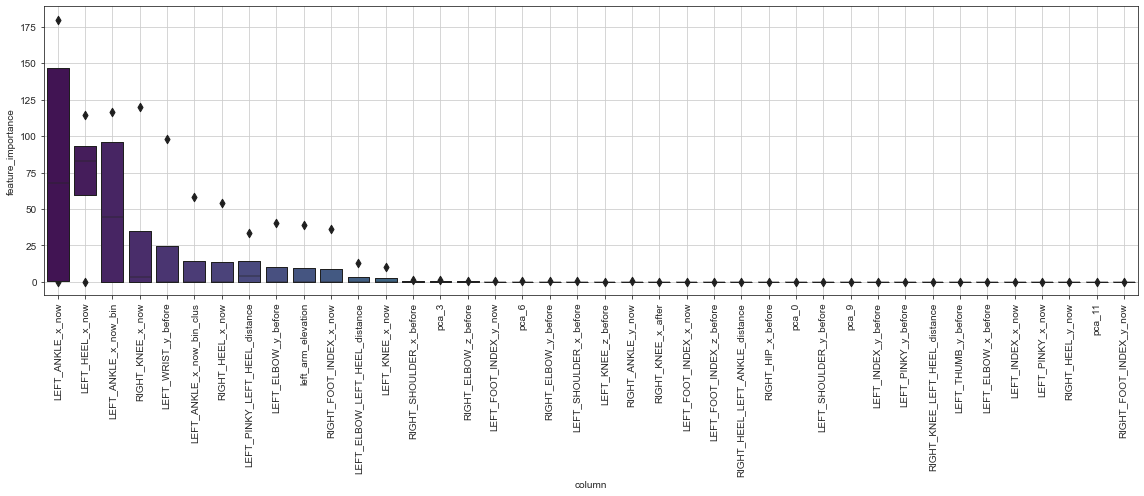

In [6159]:
fig, ax = visualize_importance(models, feature_train_df_new)

In [6160]:
pred = np.array([model.predict(feature_test_df_new.values) for model in models])
pred = np.mean(pred, axis=0)
print(pred)
pred_notround=pred
pred = np.round(pred)

[0.26304484 0.29668222 0.21628302 0.27312933 0.26254335 0.29451751
 0.27354323 0.29457304 0.27497372 0.24990049 0.21551177 0.27354338
 0.2573349  0.26304484 0.21601314 0.2375139  0.31718843 0.25469235
 0.4610706  0.49537356 0.24491548 0.27236257 0.26755621 0.26304473
 0.2181235  0.26814314 0.27204818 0.24876077 0.24101485 0.26814709
 0.67817962 0.46257159 0.5076177  0.47555449 0.68272932 0.47809136
 0.690512   0.54791226 0.66714407 0.51031561 0.46260401 0.31865015
 0.67476355 0.67216058 0.64175697 0.6758324  0.67864536 0.63616959
 0.67800667 0.6386221  0.6384634  0.67864821 0.68007079 0.63786764
 0.73985424 0.63680947 0.73650809 0.51300209 0.63851587 0.67529317
 0.67960471 0.67801133 0.67475624 0.67864248 0.63538271 0.62951142
 0.67593927 0.63807609 0.67593711 0.67592921 0.64112637 0.67477873
 0.63493539 0.67865086 0.50193121 0.69035013 0.68883303 0.69037355
 0.67217665 0.45926398 0.67307196 0.69274147 0.67606112 0.69017041
 0.75200108 0.4663939  0.67286059 0.67583753 0.66920951 0.6509

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


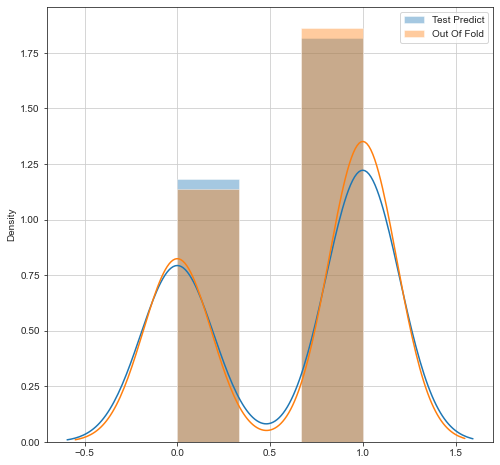

In [6161]:
# oofとpredの分布はtrainとtestの分布がそもそも違うので一致しないと思う
fig, ax = plt.subplots(figsize=(8, 8))
sns.distplot(pred, label='Test Predict')
sns.distplot(oof, label='Out Of Fold')
ax.legend()
ax.grid()

In [6162]:
#SVM
pred_svm = np.array([model_svm.predict(feature_test_df_scaler.values) for model_svm in models_svm])
pred_svm = np.mean(pred_svm, axis=0)
pred_svm_notround=pred_svm
print(pred_svm)
pred_svm= np.round(pred_svm)

[0.   0.   0.   0.   0.25 0.25 0.   0.5  0.25 0.25 0.25 0.25 0.   0.
 0.   0.   0.   0.   0.   0.5  0.5  0.   0.25 0.   0.   0.   0.   0.
 0.   0.   1.   0.25 0.25 0.25 0.75 0.75 0.75 0.75 0.25 0.5  0.25 0.25
 0.75 0.5  0.25 0.75 1.   0.25 1.   0.75 1.   1.   1.   1.   1.   0.5
 1.   0.25 0.5  0.75 1.   1.   0.25 1.   0.25 0.75 0.75 1.   1.   0.75
 0.5  1.   0.25 1.   1.   1.   1.   0.25 0.25 0.75 0.75 1.   0.75 1.
 1.   0.75 1.   0.75 0.75 1.   1.   1.   1.   1.  ]


In [6163]:
#SVM
pred_non_lenear_svm = np.array([model_non_lenear_svm.predict(feature_test_df_scaler.values) for model_non_lenear_svm in models_non_lenear_svm])
pred_non_lenear_svm = np.mean(pred_non_lenear_svm, axis=0)
pred_non_lenear_svm_notround=pred_non_lenear_svm
print(pred_non_lenear_svm)
pred_non_lenear_svm= np.round(pred_non_lenear_svm)

[0.   0.25 0.   0.   0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.   0.
 0.   0.   0.   0.   0.25 0.5  0.25 0.25 0.25 0.   0.   0.   0.   0.
 0.   0.   0.25 0.5  0.25 0.25 0.25 0.75 0.75 0.75 0.25 0.25 0.25 0.25
 0.5  0.25 0.25 0.25 0.5  0.25 1.   0.25 0.25 0.75 1.   0.25 0.25 0.25
 1.   0.25 0.25 0.5  0.5  0.75 0.25 1.   0.25 0.25 0.5  0.25 0.5  0.5
 0.25 1.   0.25 1.   1.   1.   1.   0.25 0.25 0.25 0.25 1.   0.25 1.
 1.   0.25 0.25 0.25 0.75 1.   1.   1.   1.   1.  ]


In [6164]:
#Logistic regression
pred_log = np.array([model_log.predict(feature_test_df_scaler.values) for model_log in models_log])
pred_log = np.mean(pred_log, axis=0)
pred_log_notround=pred_log
print(pred_log)
pred_log= np.round(pred_log)

[0.   0.25 0.   0.   0.25 0.25 0.25 0.5  0.25 0.5  0.25 0.25 0.   0.
 0.   0.   0.   0.   0.25 0.5  0.5  0.25 0.25 0.   0.   0.   0.   0.
 0.   0.   1.   0.25 0.25 0.25 0.75 0.75 0.75 0.75 0.25 0.5  0.25 0.25
 0.75 0.25 0.25 0.25 0.75 0.25 1.   0.75 1.   1.   1.   0.75 1.   0.25
 1.   0.25 0.25 0.75 0.75 0.75 0.25 1.   0.25 0.25 0.75 0.5  1.   0.5
 0.5  1.   0.25 1.   1.   1.   1.   0.5  0.25 0.75 0.75 1.   0.75 1.
 1.   0.5  1.   1.   1.   1.   1.   1.   1.   1.  ]


# private_score

In [6165]:
print(pred_notround*0.65+pred_svm_notround*0.35)
pred_ansem=np.round(pred_notround*0.65+pred_svm_notround*0.35)

[0.17097915 0.19284344 0.14058396 0.17753406 0.25815318 0.27893638
 0.1778031  0.36647248 0.26623291 0.24993532 0.22758265 0.2653032
 0.16726768 0.17097915 0.14040854 0.15438403 0.20617248 0.16555002
 0.29969589 0.49699281 0.33419506 0.17703567 0.26141153 0.17097908
 0.14178027 0.17429304 0.17683132 0.1616945  0.15665965 0.17429561
 0.79081675 0.38817154 0.4174515  0.39661042 0.70627406 0.57325939
 0.7113328  0.61864297 0.52114365 0.50670515 0.38819261 0.2946226
 0.70109631 0.61190438 0.50464203 0.70179106 0.79111948 0.50101023
 0.79070433 0.67760436 0.76500121 0.79112134 0.79204601 0.76461396
 0.83090526 0.58892616 0.82873026 0.42095136 0.59003531 0.70144056
 0.79174306 0.79070737 0.52609155 0.79111761 0.50049876 0.67168242
 0.70186053 0.76474946 0.78935912 0.70185398 0.59173214 0.78860618
 0.500208   0.79112306 0.67625529 0.79872758 0.79774147 0.53624281
 0.52441483 0.56102159 0.69999677 0.80028196 0.70193973 0.79861077
 0.8388007  0.56565604 0.78735938 0.70179439 0.69748618 0.773093

In [6166]:
print(pred_notround*0.4+pred_svm_notround*0.4+pred_log_notround*0.2)
pred_ansem_1=np.round(pred_notround*0.4+pred_svm_notround*0.4+pred_log_notround*0.2)

[0.10521794 0.16867289 0.08651321 0.10925173 0.25501734 0.267807
 0.15941729 0.41782922 0.25998949 0.2999602  0.23620471 0.25941735
 0.10293396 0.10521794 0.08640526 0.09500556 0.12687537 0.10187694
 0.23442824 0.49814942 0.39796619 0.15894503 0.25702248 0.10521789
 0.0872494  0.10725726 0.10881927 0.09950431 0.09640594 0.10725884
 0.87127185 0.33502864 0.35304708 0.3402218  0.72309173 0.64123654
 0.7262048  0.6691649  0.41685763 0.50412624 0.3350416  0.27746006
 0.71990542 0.51886423 0.40670279 0.62033296 0.82145814 0.40446784
 0.87120267 0.70544884 0.85538536 0.87145928 0.87202832 0.80514705
 0.8959417  0.50472379 0.89460323 0.35520084 0.50540635 0.72011727
 0.82184188 0.82120453 0.41990249 0.87145699 0.40415308 0.60180457
 0.72037571 0.75523044 0.87037484 0.67037168 0.55645055 0.86991149
 0.40397416 0.87146034 0.80077248 0.87614005 0.87553321 0.47614942
 0.41887066 0.63370559 0.71922878 0.87709659 0.72042445 0.87606817
 0.90080043 0.58655756 0.86914424 0.77033501 0.7676838  0.860365

In [6167]:
#lightgbm
print(accuracy_score(pred,y_ans))
#svm
print(accuracy_score(pred_svm,y_ans))
#svm_non_lenear
print(accuracy_score(pred_non_lenear_svm,y_ans))
#logistic
print(accuracy_score(pred_log,y_ans))
#ansemble
print(accuracy_score(pred_ansem,y_ans))
#ansemble_1
print(accuracy_score(pred_ansem_1,y_ans))


0.9042553191489362
0.8191489361702128
0.6276595744680851
0.7659574468085106
0.9148936170212766
0.851063829787234


In [6168]:
print(train_dist)
print(test_dist)

1    71
0    61
Name: category, dtype: int64
1    52
0    42
Name: category, dtype: int64


In [6169]:
train_cv_df['ID'].value_counts()

6    33
5    32
7    31
3    15
2    13
1     8
Name: ID, dtype: int64

In [6170]:
test_cv_df['ID'].value_counts()

9    32
8    31
4    20
0    11
Name: ID, dtype: int64